K means clustering

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import make_blobs

In [112]:
datax, datay=make_blobs(1000, 2, 5)
print(datax.shape, datay.shape)

(1000, 2) (1000,)


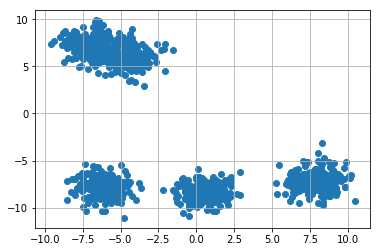

In [113]:
plt.figure(0)
plt.grid("on")
plt.scatter(datax[:, 0], datax[:, 1])
plt.show()

In [114]:
k=5 #no. of clusters
clusters={}
color={0:'cyan', 1:'red', 2:'blue', 3:'green', 4:'yellow'}
for kx in range(k):
    points=[]
    cluster_id=kx
    dim=datax.shape[1]
    center=10*(np.random.random((dim,))*2 -1)
    clusters[cluster_id]={"color":color[kx], "center":center, "points":points}
print(clusters)

{0: {'color': 'cyan', 'center': array([ 2.98489854, -9.12303154]), 'points': []}, 1: {'color': 'red', 'center': array([ 2.16896797, -8.1440969 ]), 'points': []}, 2: {'color': 'blue', 'center': array([3.86678697, 1.57156235]), 'points': []}, 3: {'color': 'green', 'center': array([ 6.03251048, -2.16894338]), 'points': []}, 4: {'color': 'yellow', 'center': array([ 7.07679289, -4.31170369]), 'points': []}}


In [115]:
def distance(v1, v2):
    return np.linalg.norm(v1-v2)

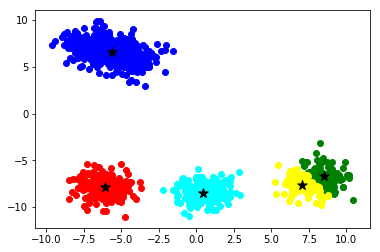

In [133]:
for ix in range(datax.shape[0]):
    dist=[]
    for kx in range(k):
        d = distance(datax[ix], clusters[kx]['center'])
        dist.append(d)
    c_id=np.argmin(dist)
    clusters[c_id]['points'].append(datax[ix])

for kx in range(k):
    pts=np.asarray(clusters[kx]['points'])
    if pts.shape[0]>0:
        ncenter=pts.mean(axis=0)
    else:
        ncenter=clusters[kx]['center']
    clusters[kx]['points']=pts
    clusters[kx]['center']=ncenter

plt.figure(0)
for kx in range(k):
    pts=np.asarray(clusters[kx]['points'])
    cc=clusters[kx]['center']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass
    plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')
    
    clusters[kx]['points']=[]

plt.show()




Making function for KMeans Clustering 

In [153]:
def kmeans(datax, k, it):
    
    clusters={}
    color={0:'cyan', 1:'red', 2:'blue', 3:'green', 4:'yellow'}
    for kx in range(k):
        points=[]
        cluster_id=kx
        dim=datax.shape[1]
        center=10*(np.random.random((dim,))*2 -1)
        clusters[cluster_id]={"color":color[kx], "center":center, "points":points}
    
    def distance(v1, v2):
        return np.linalg.norm(v1-v2)
    
    for i in range(it):
        for ix in range(datax.shape[0]):
            dist=[]
            for kx in range(k):
                d = distance(datax[ix], clusters[kx]['center'])
                dist.append(d)
            c_id=np.argmin(dist)
            clusters[c_id]['points'].append(datax[ix])

        for kx in range(k):
            pts=np.asarray(clusters[kx]['points'])
            if pts.shape[0]>0:
                ncenter=pts.mean(axis=0)
            else:
                ncenter=clusters[kx]['center']
            clusters[kx]['points']=pts
            clusters[kx]['center']=ncenter


        for kx in range(k-1):
            pts=np.asarray(clusters[kx]['points'])
            cc=clusters[kx]['center']
            try:
                plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'], marker='o')
            except:
                pass
            clusters[kx]['points']=[]
            plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')

            
        plt.show()
'''
for running the same function for several times
it is showing an error in line 22 of append cannot be used for nd array
but we are initialising points to empty list in line 41. So, why?
'''



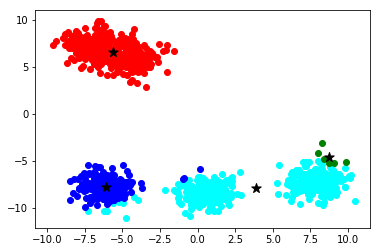

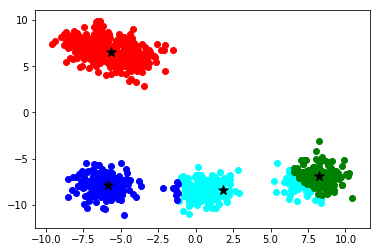

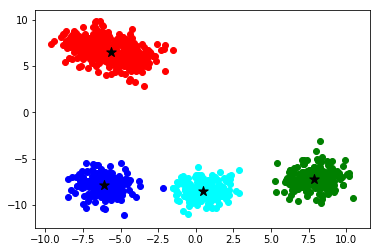

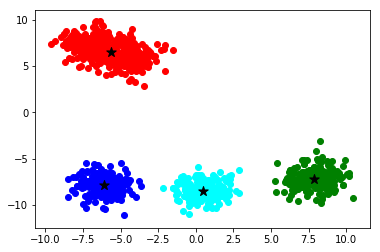

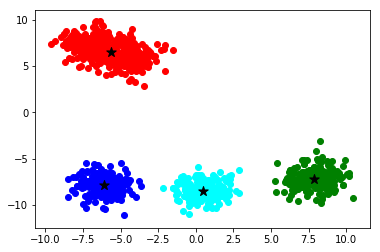

In [154]:
kmeans(datax, 5, 5)

Using sklearn for KMeans Clustering

In [102]:
from sklearn.cluster import KMeans
def kmean(datax, k):
    km=KMeans(n_clusters=k)
    km.fit(datax)
    lab=km.predict(datax)
    c=km.cluster_centers_
    return c, lab

In [157]:
c, lab = kmean(datax,5)

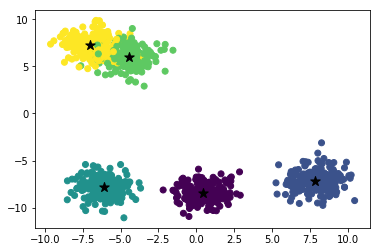

In [158]:
plt.figure(0)
plt.scatter(datax[:, 0], datax[:, 1], c=datay)
plt.scatter(c[:,0],c[:,1] ,color='black', s=100, marker='*')
plt.show()

Elbow Method for finding K

In [159]:
def clustering(datax, k, labels):
    clusters={}
    a=0
    for kx in range(k):
        point=[]
        clusters[kx]=point
    for i in labels:
        clusters[i].append(datax[a])
        a+=1
    return clusters    

In [160]:
#elbow method
y=[]
for i in range(2,20):
    x, labels=kmean(datax, i)
    dist=0
    m=0
    cl=clustering(datax, i, labels)
    for ix in x:
        for ij in range(len(cl[m])):
            d=distance(cl[m][ij], ix)
            dist+=d
        m+=1
    y.append(dist)  
print(y)

[3798.7004959372016, 2331.1234477125017, 1432.369527368196, 1202.6972197336618, 1147.4624495815701, 1081.1985616488846, 1029.360827452695, 981.9212019251327, 925.8619406966611, 889.3300319106646, 855.6186660451954, 816.9755054289616, 793.6304762091231, 773.8125518841125, 749.8803707801568, 732.0043708393032, 718.4566825811665, 702.6756860686535]


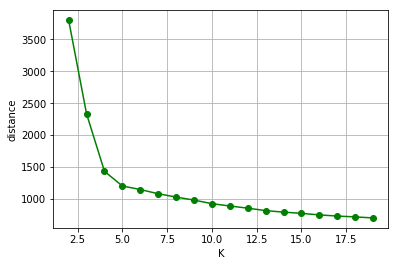

In [161]:
plt.figure(0)
plt.grid("on")
plt.xlabel("K")
plt.ylabel("distance")
plt.plot(range(2, 20), y, 'o-g')
plt.show()